In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression 
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
baseline_df=pd.read_csv('baseline_df.csv',index_col='Id')
normalized_baseline_df=pd.read_csv('normalized_baseline_df.csv',index_col='Id')
standardized_baseline_df=pd.read_csv('standardized_baseline_df.csv',index_col='Id')
baseline_df.sample(10)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,MoSold,YrSold,SalePrice,MSZoning__FV,MSZoning__RH,MSZoning__RL,MSZoning__RM,Street__Pave,Alley__No Alley,Alley__Pave,LotShape__IR2,LotShape__IR3,LotShape__Reg,LandContour__HLS,LandContour__Low,LandContour__Lvl,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,LotConfig__Inside,LandSlope__Mod,LandSlope__Sev,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NAmes,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,Condition1__Feedr,Condition1__Norm,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,Condition1__RRNe,Condition1__RRNn,Condition2__Feedr,Condition2__Norm,Condition2__PosA,Condition2__PosN,Condition2__RRAe,Condition2__RRAn,Condition2__RRNn,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,HouseStyle__1.5Unf,HouseStyle__1Story,HouseStyle__2.5Fin,HouseStyle__2.5Unf,HouseStyle__2Story,HouseStyle__SFoyer,HouseStyle__SLvl,RoofStyle__Gable,RoofStyle__Gambrel,RoofStyle__Hip,RoofStyle__Mansard,RoofStyle__Shed,RoofMatl__CompShg,RoofMatl__Membran,RoofMatl__Metal,RoofMatl__Roll,RoofMatl__Tar&Grv,RoofMatl__WdShake,RoofMatl__WdShngl,Exterior1st__AsphShn,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__CemntBd,Exterior1st__HdBoard,Exterior1st__ImStucc,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__Stone,Exterior1st__Stucco,Exterior1st__VinylSd,Exterior1st__Wd Sdng,Exterior1st__WdShing,Exterior2nd__AsphShn,Exterior2nd__Brk Cmn,Exterior2nd__BrkFace,Exterior2nd__CBlock,Exterior2nd__CmentBd,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__MetalSd,Exterior2nd__Other,Exterior2nd__Plywood,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__VinylSd,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng,MasVnrType__BrkFace,MasVnrType__No Masonry Veneer,MasVnrType__None,MasVnrType__Stone,Foundation__CBlock,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,BsmtFinType1__BLQ,BsmtFinType1__GLQ,BsmtFinType1__LwQ,BsmtFinType1__No Basement,BsmtFinType1__Rec,BsmtFinType1__Unf,Heating__GasA,Heating__GasW,Heating__Grav,Heating__OthW,Heating__Wall,CentralAir__Y,Electrical__FuseF,Electrical__FuseP,Electrical__Mix,Electrical__SBrkr,Functional__Maj2,Functional__Min1,Functional__Min2,Functional__Mod,Functional__Sev,Functional__Typ,GarageType__Attchd,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,GarageType__No Garage,GarageFinish__No Garage,GarageFinish__RFn,GarageFinish__Unf,PavedDrive__P,PavedDrive__Y,Fence__GdWo,Fence__MnPrv,Fence__MnWw,Fence__No Fence,MiscFeature__Shed,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__WD,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Normal,SaleCondition__Partial,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__160,MSSubClass__180,MSSubClass__190,WoodDeckSF__1,OpenPorchSF__1,EnclosedPorch__1,3SsnPorch__1,ScreenPorch__1,PoolArea__1
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [2]:
nominal_var_processed=['MSZoning','Street','Alley','LotShape','LandContour','LotConfig','LandSlope',\
             'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',\
             'Exterior1st','Exterior2nd','MasVnrType','Foundation',\
             'BsmtFinType1','Heating','CentralAir',\
             'Electrical','Functional','GarageType','GarageFinish',\
             'PavedDrive','Fence','MiscFeature','SaleType','SaleCondition','MSSubClass',\
             'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']
ordinal_var_processed=['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath',\
             'HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',\
             'MoSold','YrSold','HeatingQC','KitchenQual','ExterQual','ExterCond','BsmtQual',\
             'BsmtCond','BsmtExposure','FireplaceQu','GarageQual','GarageCond']
cont_var_processed=['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','TotalBsmtSF',\
          '1stFlrSF','2ndFlrSF','GrLivArea','GarageYrBlt','GarageArea']
x=baseline_df.drop('SalePrice',axis='columns')
y=baseline_df.SalePrice
standardized_x=standardized_baseline_df.drop('SalePrice',axis='columns')
standardized_y=standardized_baseline_df.SalePrice
normalized_x=normalized_baseline_df.drop('SalePrice',axis='columns')
normalized_y=normalized_baseline_df.SalePrice

In [3]:
# R^2 score of a test train data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
ols = LinearRegression()
ols.fit(x_train, y_train)
print('All Features R^2 of training set: {0:.3f}'.format(ols.score(x_train, y_train)))
print('All Features R^2 of test set: {0:.3f}'.format(ols.score(x_test, y_test)))

All Features R^2 of training set: 0.938
All Features R^2 of test set: 0.851


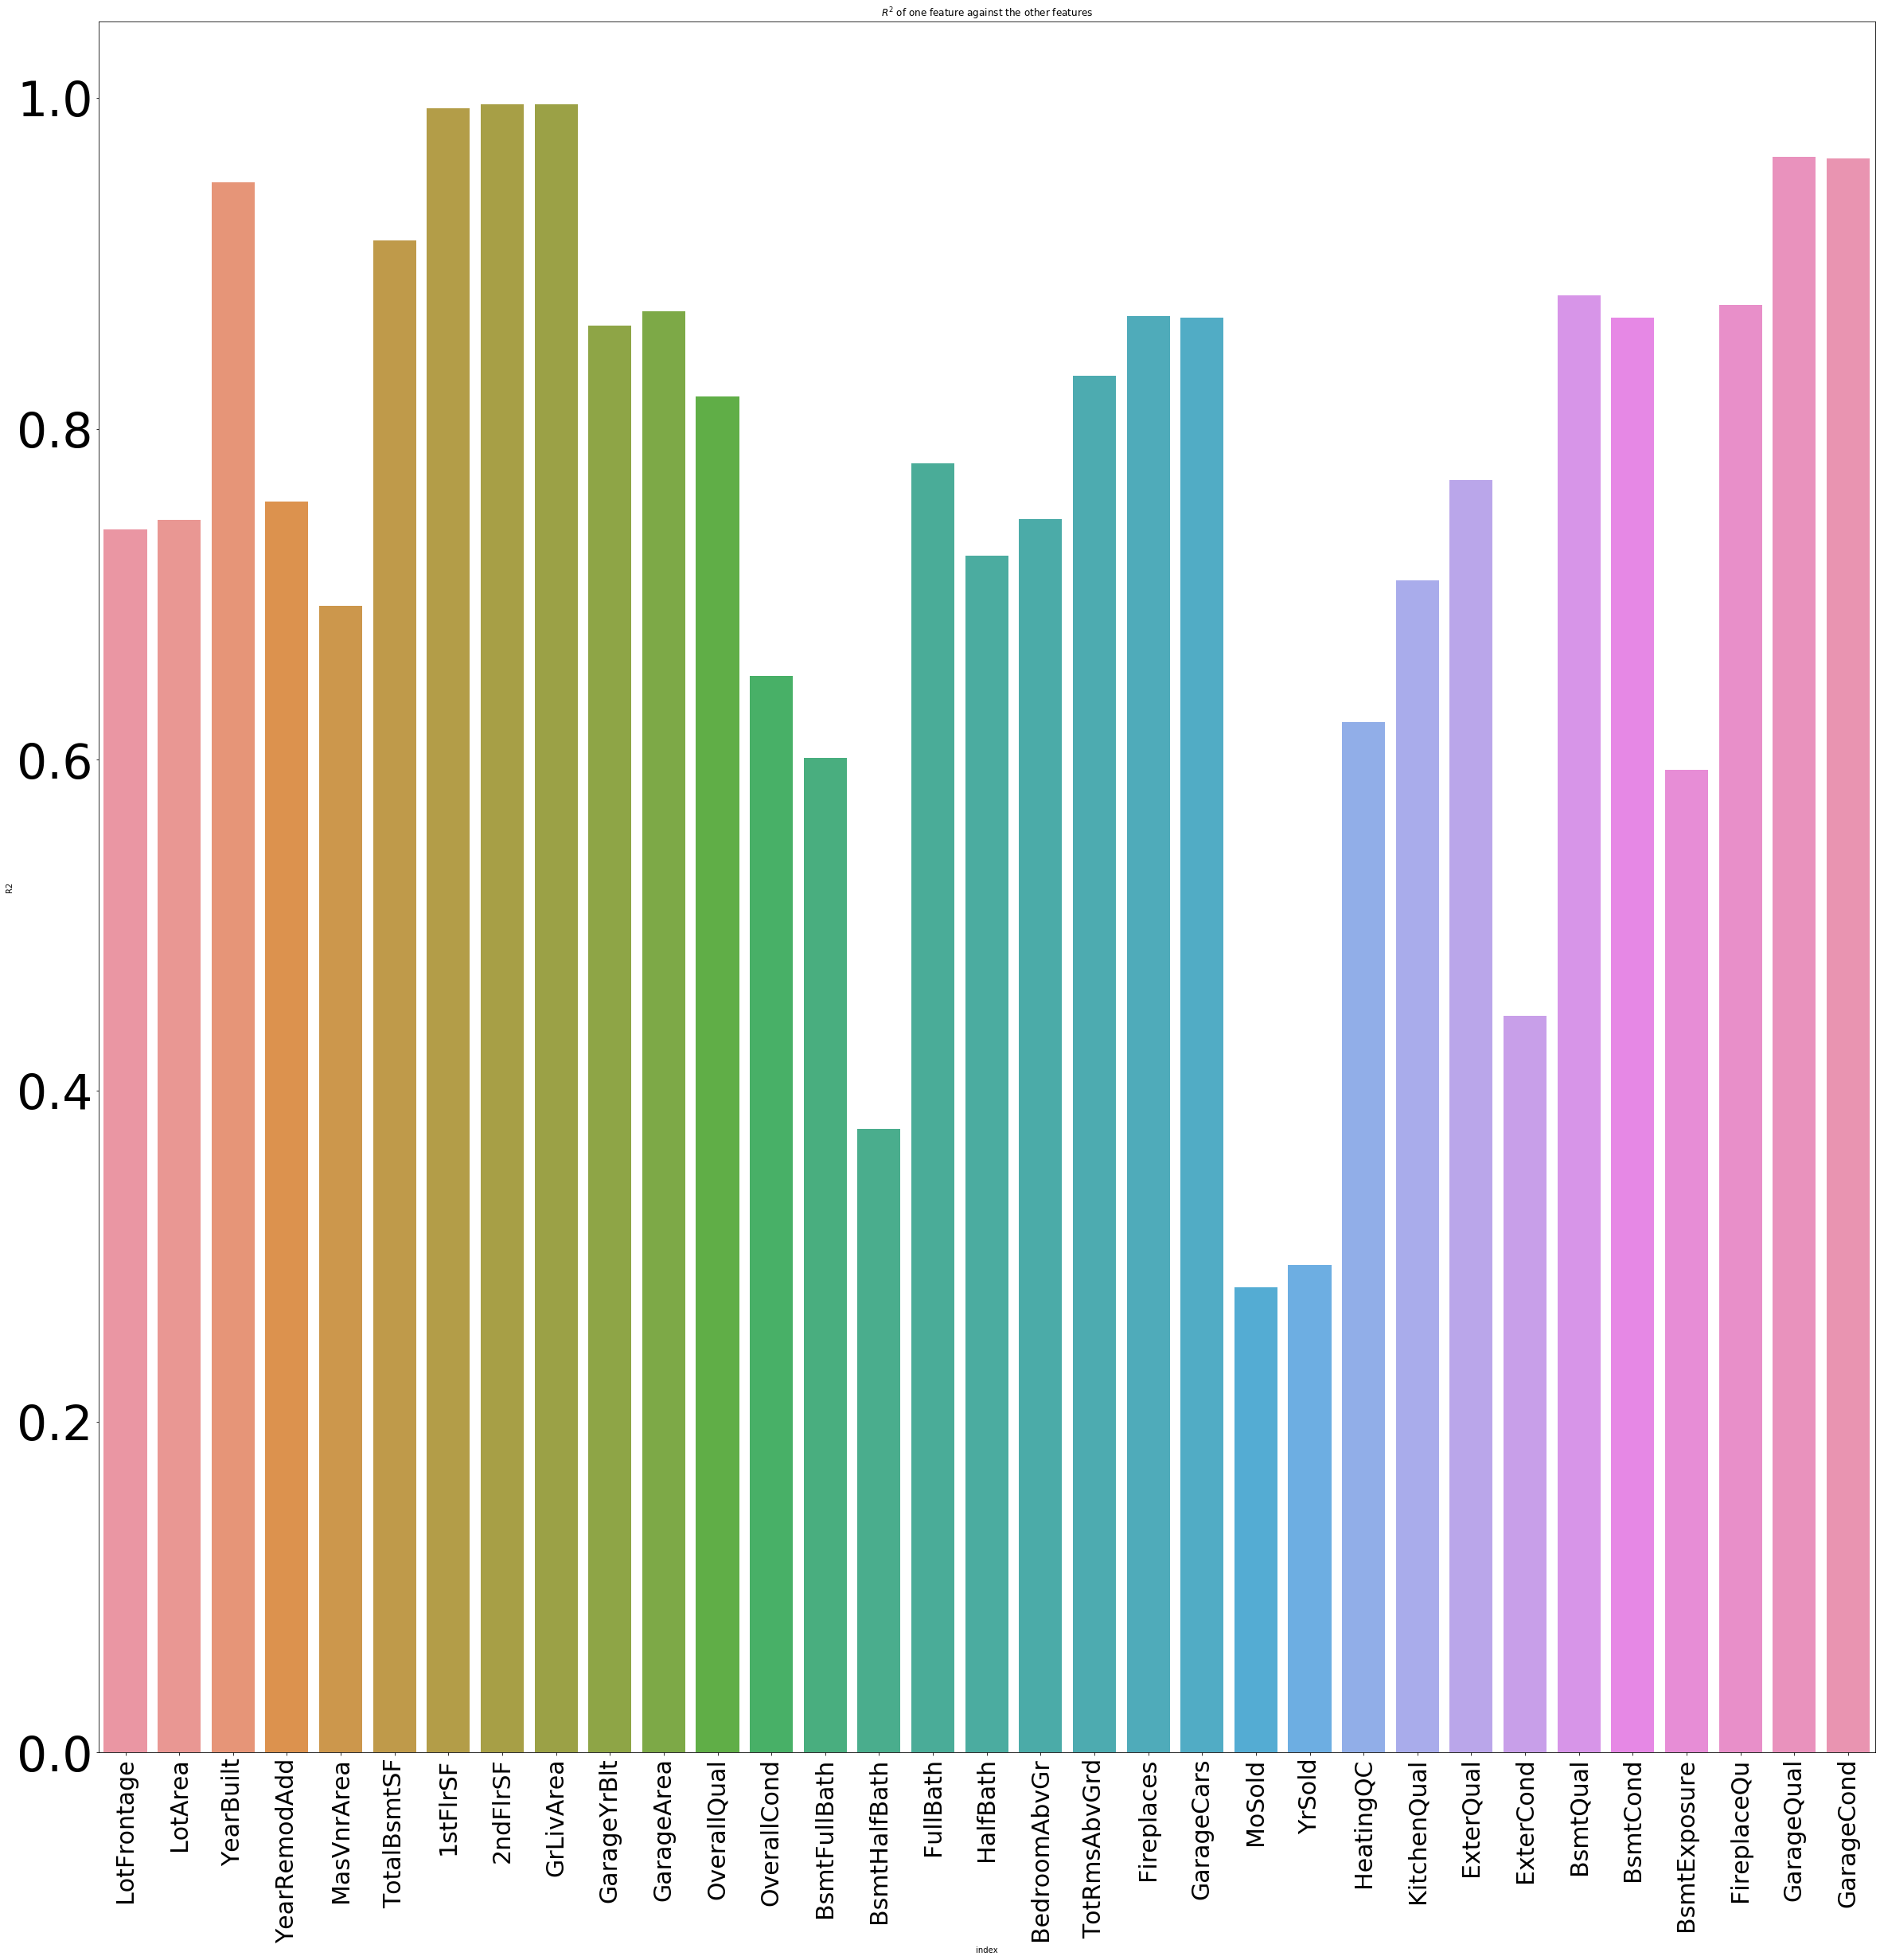

In [4]:
# R^2 score comparisons among continuous features against one another
# High R^2 means collinearity exists between the features
# Only continuous features, no nominal categories
test_cont_var=cont_var_processed+ordinal_var_processed
scores = {}
ols = LinearRegression()
for feature in test_cont_var:
                x_train_copy = x_train.copy()
                feature_col = x_train_copy[feature].copy()
                x_train_copy.drop(feature, axis=1, inplace=True)
                ols.fit(x_train_copy, feature_col)
                scores[feature] = ols.score(x_train_copy, feature_col)   
plt.figure(figsize=(40,40))
ax=sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index())
plt.title('$R^2$ of one feature against the other features');
plt.xticks(rotation=90);
plt.yticks(size=60);
plt.xticks(size=30);
# use R^2=0.4 and 0.8 as a cutoff. Below 0.4 is acceptable. Above 0.8 is unacceptable

In [5]:
# R^2 score comparisons among continuous features against one another
# High R^2 means collinearity exists between the features
# Only continuous features, no nominal categories
# use R^2=0.4 and 0.8 as a cutoff. Below 0.4 is acceptable. Above 0.8 is unacceptable
bad_feature_R2_multicol_test=[]
good_feature_R2_multicol_test=[]
for key,value in scores.items():
    if value>0.8:
        bad_feature_R2_multicol_test.append([key,value])
    elif value<0.4:
        good_feature_R2_multicol_test.append([key,value])

In [6]:
# Performing t test on each predictor (continuous and categorical all together)
# to see if coefficient is signficant
x_add_const = sm.add_constant(x_train)
ols = sm.OLS(y_train, x_add_const)
ans = ols.fit()
ans.summary()
table = pd.DataFrame(ans.summary().tables[1].data[1:])
table.columns = ['name','coef','std err','t value','p value','2.5% confidence','97.5% confidence']
table = table.astype({'name':str,'coef':float,'std err':float, 't value':float, 'p value':float,'2.5% confidence':float, '97.5% confidence':float})
table[table['p value']<0.05]

/home/auscheng/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,name,coef,std err,t value,p value,2.5% confidence,97.5% confidence
1,LotFrontage,0.000800,0.000000,2.050,0.041,0.000034,0.00200
2,LotArea,0.000006,0.000002,3.363,0.001,0.000003,0.00001
3,OverallQual,0.039400,0.006000,6.135,0.000,0.027000,0.05200
4,OverallCond,0.029100,0.005000,5.502,0.000,0.019000,0.03900
5,YearBuilt,0.002200,0.001000,4.384,0.000,0.001000,0.00300
6,YearRemodAdd,0.000700,0.000000,2.139,0.033,0.000057,0.00100
12,BsmtExposure,0.011900,0.005000,2.229,0.026,0.001000,0.02200
13,TotalBsmtSF,0.000100,0.000034,3.365,0.001,0.000047,0.00000
17,GrLivArea,0.000600,0.000000,3.780,0.000,0.000000,0.00100
18,BsmtFullBath,0.038300,0.010000,3.679,0.000,0.018000,0.05900


In [7]:
# Performing t test on each predictor (continuous and categorical)
# to see if coefficient is signficant
good_feature_beta_t_test=list(table[table['p value']<0.05].name)
bad_feature_beta_t_test=list(table[table['p value']>0.20].name)
# bad_feature_beta_t_test.remove('const') # remove the intercept entry

In [8]:
# comparing standardized vs normalized data vs untreated data
standardize_cont_var=ordinal_var_processed+cont_var_processed
# Performing t test on each predictor (continuous and ordinal only!! only these are scaled)
# to see if coefficient is signficant
# REMINDER: SALE PRICE IS LOGGED

# comparing standardized vs normalized data vs untreated data
standardized_x_train, standardized_x_test, standardized_y_train, standardized_y_test = train_test_split(standardized_x, standardized_y, test_size=0.3, random_state=0)
normalized_x_train, normalized_x_test, normalized_y_train, normalized_y_test = train_test_split(normalized_x, normalized_y, test_size=0.3, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Untreated, unscaled data
x_add_const = sm.add_constant(x_train[standardize_cont_var])
ols = sm.OLS(y_train, x_add_const)
ans = ols.fit()
table = pd.DataFrame(ans.summary().tables[1].data[1:])
table.columns = ['name','coef','std err','t value','p value','2.5% confidence','97.5% confidence']
table = table.astype({'name':str,'coef':float,'std err':float, 't value':float, 'p value':float, '2.5% confidence':float, '97.5% confidence':float})
#slope_table = table[['name', 'coef', '2.5% confidence', '97.5% confidence']].iloc[1:]

# standardized data
standardized_x_add_const = sm.add_constant(standardized_x_train[standardize_cont_var])
ols = sm.OLS(standardized_y_train, standardized_x_add_const)
standardized_ans = ols.fit()
standardized_table = pd.DataFrame(standardized_ans.summary().tables[1].data[1:])
standardized_table.columns = ['name','coef','std err','t value','p value','2.5% confidence','97.5% confidence']
standardized_table = standardized_table.astype({'name':str,'coef':float,'std err':float, 't value':float, 'p value':float, '2.5% confidence':float, '97.5% confidence':float})
#standardized_slope_table = standardized_table[['name', 'coef', '2.5% confidence', '97.5% confidence']].iloc[1:]

# normalized data
normalized_x_add_const = sm.add_constant(normalized_x_train[standardize_cont_var])
ols = sm.OLS(normalized_y_train, normalized_x_add_const)
normalized_ans = ols.fit()
normalized_table = pd.DataFrame(normalized_ans.summary().tables[1].data[1:])
normalized_table.columns = ['name','coef','std err','t value','p value','2.5% confidence','97.5% confidence']
normalized_table = normalized_table.astype({'name':str,'coef':float,'std err':float, 't value':float, 'p value':float, '2.5% confidence':float, '97.5% confidence':float})
#normalized_slope_table = normalized_table[['name', 'coef', '2.5% confidence', '97.5% confidence']].iloc[1:]

#################################
# plotting the mean and confidence interval
# variable_index = range(1,x_train.shape[1]+1)
# plt.figure(figsize=(30,30))
# plt.scatter(list(x_train), slope_table['coef'], label='slope', c='b')
# plt.axhline(0,linestyle='--', c='r')

# for i in variable_index:
#     plt.plot([i-1,i-1],[slope_table['2.5% confidence'][i],slope_table['97.5% confidence'][i]],marker='+',color='red', alpha=0.3)
# plt.xticks(list(x_train),slope_table.name,rotation='vertical')
# plt.title('slopes and their CIs')
# plt.legend(loc=4)
# plt.yticks(size=40);
# plt.xticks(size=30);
#################################
unscaled_good_feature=list(table[table['p value']<0.05].name)
standardized_good_feature=list(standardized_table[standardized_table['p value']<0.05].name)
# standardized_good_feature.remove('const')
normalized_good_feature=list(normalized_table[normalized_table['p value']<0.05].name)
# normalized_good_feature.remove('const')
print(unscaled_good_feature==standardized_good_feature)
print(standardized_good_feature==normalized_good_feature)

True
True


In [9]:
# feature significance prediction is the same scaled vs not scaled 
# continue comparing standardized vs normalized data vs untreated data 
# check on results on test dataset
x_add_const = sm.add_constant(x_train)
ols = sm.OLS(y_train, x_add_const)
ans = ols.fit()
print('unscaled ',ans.summary().tables[0].data[1][2],ans.rsquared_adj)

standardized_x_add_const = sm.add_constant(standardized_x_train)
ols = sm.OLS(standardized_y_train, standardized_x_add_const)
standardized_ans = ols.fit()
print('standardized ',ans.summary().tables[0].data[1][2],ans.rsquared_adj)

normalized_x_add_const = sm.add_constant(normalized_x_train)
ols = sm.OLS(normalized_y_train, normalized_x_add_const)
normalized_ans = ols.fit()
print('normalized ',ans.summary().tables[0].data[1][2],ans.rsquared_adj)


unscaled    Adj. R-squared:     0.9177471881655509
standardized    Adj. R-squared:     0.9177471881655509
normalized    Adj. R-squared:     0.9177471881655509


In [10]:
standardized_x_train, standardized_x_test, standardized_y_train, standardized_y_test = train_test_split(standardized_x, standardized_y, test_size=0.3, random_state=0)
normalized_x_train, normalized_x_test, normalized_y_train, normalized_y_test = train_test_split(normalized_x, normalized_y, test_size=0.3, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
ols = LinearRegression()
ols.fit(x_train[standardize_cont_var], y_train)
print('Cont. Features R^2 of training set: {0:.3f}'.format(ols.score(x_train[standardize_cont_var], y_train)))
print('Cont. Features R^2 of test set: {0:.3f}'.format(ols.score(x_test[standardize_cont_var], y_test)))

ols.fit(standardized_x_train[standardize_cont_var], standardized_y_train)
print('Standardized Cont. Features R^2 of training set: {0:.3f}'.format(ols.score(standardized_x_train[standardize_cont_var], standardized_y_train)))
print('Standardized Cont. Features R^2 of test set: {0:.3f}'.format(ols.score(standardized_x_test[standardize_cont_var], standardized_y_test)))

ols.fit(normalized_x_train[standardize_cont_var], normalized_y_train)
print('Normalized Cont. Features R^2 of training set: {0:.3f}'.format(ols.score(normalized_x_train[standardize_cont_var], normalized_y_train)))
print('Normalized Cont. Features R^2 of test set: {0:.3f}'.format(ols.score(normalized_x_test[standardize_cont_var], normalized_y_test)))

Cont. Features R^2 of training set: 0.877
Cont. Features R^2 of test set: 0.860
Standardized Cont. Features R^2 of training set: 0.877
Standardized Cont. Features R^2 of test set: 0.860
Normalized Cont. Features R^2 of training set: 0.877
Normalized Cont. Features R^2 of test set: 0.860


### Standardize and Normalize seem equal
### Standardize and Normalize seem to yield same result as unscaled for continuous variables
### Standardize and Normalize run into problems during regression if categorical variables are scaled
### Open Question: It doesn't make sense to scale categorical variables already, we also run into trouble if we scale them. What to do???
### NOTE: be sure to change the standardized and normalized dataframe to include scaling of categorical variables if you want to do the comparison. Currently loaded dataframes only scale continuous variables!